In [2]:

%matplotlib inline

import pandas as pd
import sklearn
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cross_validation import train_test_split
import random

In [4]:
loandata = pd.read_csv('../data/LoanStats3d.csv',skiprows=[0] ,index_col='id')

C:\Users\Dom\Anaconda2\lib\site-packages\IPython\core\interactiveshell.py:2723: DtypeWarning: Columns (0,19,55) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [5]:
loandata.head()

,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
id,,,,,,,,,,,,,,,,,,,,,
68426699,73316523.0,20000.0,20000.0,20000.0,36 months,6.49%,612.89,A,A2,"TEAM LEAD, QUALITY ENGINEER",...,0.0,2.0,95.7,0.0,0.0,0.0,247433.0,41663.0,12700.0,46367.0
67275481,72077199.0,20000.0,20000.0,20000.0,36 months,8.49%,631.26,B,B1,road driver,...,1.0,0.0,93.3,0.0,0.0,0.0,193390.0,27937.0,14500.0,36144.0
68446771,73336594.0,7200.0,7200.0,7200.0,36 months,15.77%,252.32,D,D1,Bank Officer Senior Customer Care Spec.,...,0.0,3.0,97.7,50.0,0.0,1.0,255047.0,275831.0,6700.0,246447.0
68615044,73517819.0,16000.0,16000.0,16000.0,60 months,13.99%,372.21,C,C4,Registered Nurse,...,0.0,0.0,73.7,25.0,0.0,2.0,704224.0,112166.0,5100.0,124120.0
68466995,73356835.0,10000.0,10000.0,10000.0,36 months,7.91%,312.95,A,A5,Teacher,...,0.0,1.0,100.0,0.0,0.0,0.0,35247.0,27354.0,13000.0,20447.0


In [6]:
list(loandata.columns.values)

['member_id',
 'loan_amnt',
 'funded_amnt',
 'funded_amnt_inv',
 'term',
 'int_rate',
 'installment',
 'grade',
 'sub_grade',
 'emp_title',
 'emp_length',
 'home_ownership',
 'annual_inc',
 'verification_status',
 'issue_d',
 'loan_status',
 'pymnt_plan',
 'url',
 'desc',
 'purpose',
 'title',
 'zip_code',
 'addr_state',
 'dti',
 'delinq_2yrs',
 'earliest_cr_line',
 'inq_last_6mths',
 'mths_since_last_delinq',
 'mths_since_last_record',
 'open_acc',
 'pub_rec',
 'revol_bal',
 'revol_util',
 'total_acc',
 'initial_list_status',
 'out_prncp',
 'out_prncp_inv',
 'total_pymnt',
 'total_pymnt_inv',
 'total_rec_prncp',
 'total_rec_int',
 'total_rec_late_fee',
 'recoveries',
 'collection_recovery_fee',
 'last_pymnt_d',
 'last_pymnt_amnt',
 'next_pymnt_d',
 'last_credit_pull_d',
 'collections_12_mths_ex_med',
 'mths_since_last_major_derog',
 'policy_code',
 'application_type',
 'annual_inc_joint',
 'dti_joint',
 'verification_status_joint',
 'acc_now_delinq',
 'tot_coll_amt',
 'tot_cur_bal',
 

In [22]:
loandata.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
Index: 421097 entries, 68426699 to Total amount funded in policy code 2: 1944088810
Data columns (total 110 columns):
member_id                         float64
loan_amnt                         float64
funded_amnt                       float64
funded_amnt_inv                   float64
term                              object
int_rate                          object
installment                       float64
grade                             object
sub_grade                         object
emp_title                         object
emp_length                        object
home_ownership                    object
annual_inc                        float64
verification_status               object
issue_d                           object
loan_status                       object
pymnt_plan                        object
url                               object
desc                              object
purpose                           object
title             

In [7]:
loandata.describe(include='all')

,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
count,4.210950e+05,421095.000000,421095.000000,421095.000000,421095,421095,421095.000000,421095,421095,397221,...,421095.000000,421095.000000,421095.000000,416856.000000,421095.000000,421095.000000,4.210950e+05,4.210950e+05,421095.000000,4.210950e+05
unique,NaN,NaN,NaN,NaN,2,110,NaN,7,35,120812,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,NaN,NaN,36 months,7.89%,NaN,C,C1,Teacher,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,NaN,NaN,283173,20310,NaN,120567,26434,8070,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,5.759576e+07,15240.285862,15240.285862,15234.156307,NaN,NaN,441.870837,NaN,NaN,NaN,...,0.094318,2.170947,93.924313,47.527110,0.133188,0.064556,1.734070e+05,5.222199e+04,21958.208958,4.347865e+04
std,1.013358e+07,8571.325901,8571.325901,8567.935724,NaN,NaN,244.856460,NaN,NaN,NaN,...,0.522758,1.853858,8.875399,36.054458,0.385975,0.444231,1.756722e+05,4.907494e+04,21840.371112,4.394271e+04
min,7.082500e+04,1000.000000,1000.000000,900.000000,NaN,NaN,30.120000,NaN,NaN,NaN,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.500000e+03,0.000000e+00,0.000000,0.000000e+00
25%,4.922617e+07,8500.000000,8500.000000,8500.000000,NaN,NaN,263.930000,NaN,NaN,NaN,...,0.000000,1.000000,90.900000,15.400000,0.000000,0.000000,5.090900e+04,2.259850e+04,7800.000000,1.548150e+04
50%,5.895358e+07,14000.000000,14000.000000,14000.000000,NaN,NaN,385.420000,NaN,NaN,NaN,...,0.000000,2.000000,97.400000,50.000000,0.000000,0.000000,1.114050e+05,3.959600e+04,15200.000000,3.297000e+04
75%,6.604584e+07,20000.000000,20000.000000,20000.000000,NaN,NaN,578.790000,NaN,NaN,NaN,...,0.000000,3.000000,100.000000,75.000000,0.000000,0.000000,2.496290e+05,6.565100e+04,28600.000000,5.829900e+04


# Data understanding

The reponse variable the learner will try to predict is the final loan_status, whether 'Fully Paid' or 'Charged Off' (i.e. severly delinquent and assess by the creditor as unlikly to be paid).

## Features to be used

The features I'll consider to use in the learner are:
* acc_open_past_24mths
* addr_state
* all_util
* annual_inc
* annual_inc_joint
* application_type
* avg_cur_bal
* bc_open_to_buy
* bc_util
* chargeoff_within_12_mths
* collection_recovery_fee
* collections_12_mths_ex_med
* delinq_2yrs
* delinq_amnt
* dti
* dti_joint
* earliest_cr_line
* emp_length
* emp_title
* fico_range_high
* fico_range_low
* funded_amnt
* funded_amnt_inv
* grade
* home_ownership
* il_util
* initial_list_status
* inq_fi
* inq_last_12m
* inq_last_6mths
* installment
* int_rate
* last_credit_pull_d
* last_fico_range_high
* last_fico_range_low
* last_pymnt_amnt
* last_pymnt_d
* loan_amnt
* max_bal_bc
* member_id
* mo_sin_old_il_acct
* mo_sin_old_rev_tl_op
* mo_sin_rcnt_rev_tl_op
* mo_sin_rcnt_tl
* mort_acc
* mths_since_last_delinq
* mths_since_last_major_derog
* mths_since_last_record
* mths_since_rcnt_il
* mths_since_recent_bc
* mths_since_recent_bc_dlq
* mths_since_recent_inq
* mths_since_recent_revol_delinq
* num_accts_ever_120_pd
* num_actv_bc_tl
* num_actv_rev_tl
* num_bc_sats
* num_bc_tl
* num_il_tl
* num_op_rev_tl
* num_rev_accts
* num_rev_tl_bal_gt_0
* num_sats
* num_tl_120dpd_2m
* num_tl_30dpd
* num_tl_90g_dpd_24m
* num_tl_op_past_12m
* open_acc
* open_acc_6m
* open_il_12m
* open_il_24m
* open_il_6m
* open_rv_12m
* open_rv_24m
* out_prncp
* out_prncp_inv
* pct_tl_nvr_dlq
* percent_bc_gt_75
* policy_code
* pub_rec
* pub_rec_bankruptcies
* purpose
* pymnt_plan
* recoveries
* revol_bal
* revol_util
* sub_grade
* tax_liens
* term
* tot_coll_amt
* tot_cur_bal
* tot_hi_cred_lim
* total_acc
* total_bal_ex_mort
* total_bal_il
* total_bc_limit
* total_cu_tl
* total_il_high_credit_limit
* total_pymnt
* total_pymnt_inv
* total_rec_int
* total_rec_late_fee
* total_rec_prncp
* total_rev_hi_lim  
* verification_status
* verified_status_joint

The above list of features is prior to any approaches to reduce the number of dimensions

In [8]:
print loandata.loan_status.value_counts()
# For the project I'll limit the scopr to just looking at loan_status of 'Fully Paid' and 'Charged Off'

Current               371168
Fully Paid             34061
Charged Off             6011
Late (31-120 days)      5648
In Grace Period         2828
Late (16-30 days)       1251
Default                  128
Name: loan_status, dtype: int64


In [9]:
completedloans=loandata[(loandata.loan_status=='Charged Off')|(loandata.loan_status=='Fully Paid')]

In [45]:
# Split into test and training sets. Allocating 80% for training data
random.seed(1234)
traindata, testdata = train_test_split(completedloans, test_size = 0.2)

In [11]:
# Check for collinearity between variables
traindata.corr(method="pearson")

,member_id,loan_amnt,funded_amnt,funded_amnt_inv,installment,annual_inc,dti,delinq_2yrs,inq_last_6mths,mths_since_last_delinq,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
member_id,1.000000,-0.001585,-0.001585,-0.001894,-0.007640,0.029365,-0.035756,-0.005220,0.004171,0.006478,...,-0.004607,0.035067,0.003757,-0.067023,0.006440,-0.003554,0.027686,0.009819,0.035758,0.017872
loan_amnt,-0.001585,1.000000,1.000000,0.999996,0.951990,0.266633,-0.001576,-0.018262,-0.017467,-0.043969,...,-0.032358,-0.014118,0.103512,0.027483,-0.135928,0.003594,0.350520,0.286148,0.383148,0.195461
funded_amnt,-0.001585,1.000000,1.000000,0.999996,0.951990,0.266633,-0.001576,-0.018262,-0.017467,-0.043969,...,-0.032358,-0.014118,0.103512,0.027483,-0.135928,0.003594,0.350520,0.286148,0.383148,0.195461
funded_amnt_inv,-0.001894,0.999996,0.999996,1.000000,0.951991,0.266642,-0.001654,-0.018284,-0.017530,-0.043940,...,-0.032372,-0.014183,0.103570,0.027408,-0.135900,0.003600,0.350556,0.286158,0.383225,0.195475
installment,-0.007640,0.951990,0.951990,0.951991,1.000000,0.256765,-0.000649,-0.008891,0.015231,-0.041961,...,-0.023848,0.016095,0.085545,0.040609,-0.121865,0.011170,0.320497,0.270683,0.347106,0.180916
annual_inc,0.029365,0.266633,0.266633,0.266642,0.256765,1.000000,-0.170675,0.058322,0.017017,-0.044837,...,0.009671,0.034719,-0.016507,-0.015888,-0.048015,0.023456,0.356366,0.274830,0.229033,0.220014
dti,-0.035756,-0.001576,-0.001576,-0.001654,-0.000649,-0.170675,1.000000,-0.020297,-0.000780,0.008295,...,-0.021443,0.086538,0.101141,0.198845,-0.041509,-0.033055,-0.020835,0.275970,0.006656,0.310714
delinq_2yrs,-0.005220,-0.018262,-0.018262,-0.018284,-0.008891,0.058322,-0.020297,1.000000,0.030850,-0.545673,...,0.677727,-0.021631,-0.429486,-0.013223,-0.036656,0.010345,0.052600,0.019028,-0.076181,0.046858
inq_last_6mths,0.004171,-0.017467,-0.017467,-0.017530,0.015231,0.017017,-0.000780,0.030850,1.000000,0.037272,...,0.048106,0.360670,-0.051468,-0.074311,0.127211,0.019133,-0.004604,0.019485,0.002041,0.028710
mths_since_last_delinq,0.006478,-0.043969,-0.043969,-0.043940,-0.041961,-0.044837,0.008295,-0.545673,0.037272,1.000000,...,-0.219301,0.098056,0.169439,0.007865,0.170288,0.009229,-0.109308,-0.040651,-0.031359,-0.041041


## Some visualisations

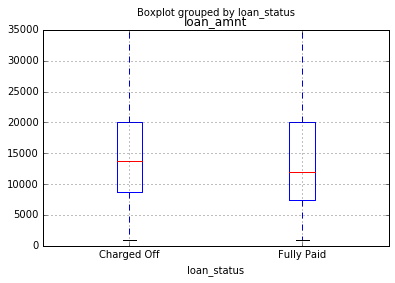

In [12]:
#loandata.boxplot(column='loan_amnt',by='loan_status')
traindata.boxplot(column='loan_amnt',by='loan_status')

# We can observe that loans that resulted in being charged off had a higher median loan amount

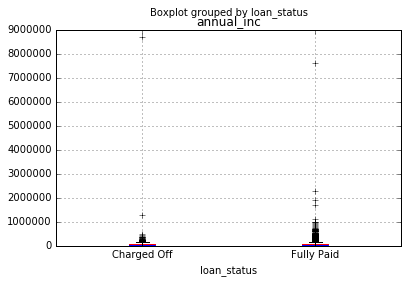

In [13]:
traindata.boxplot(column='annual_inc',by='loan_status')

# Hard to see, but it looks like annual income would be a good predictor to include
# Need to find a way to make the y a log scale

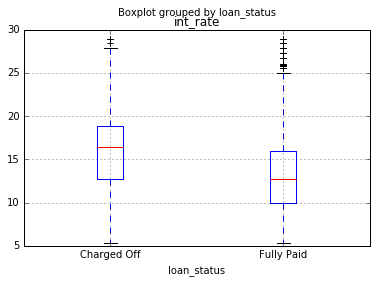

In [48]:
#
traindata.int_rate = pd.Series(traindata.int_rate).str.replace('%', '').astype(float)
traindata.boxplot(column='int_rate',by='loan_status')

# As this boxplot shows, higher interest rates would make a loan more expensive to service

completedloans.acc_now_delinq.dtype

## Selecting the features we need
With 110 columns in our data set there's a bit of work involved in cleaning up the data set to something more manageable. We'll only keep the columns that have predictive power. I'll carry out this feature reduction looking at a subset of columns at a time.

### First Slice

In [31]:
traindata.ix[:3,:10]

,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title
id,,,,,,,,,,
63419398,67762228.0,12000.0,12000.0,11750.0,36 months,11.49,395.66,B,B5,Senior Underwriting Asssistant
40522703,43387511.0,15000.0,15000.0,15000.0,36 months,12.99,505.34,C,C2,Service Manager
50073829,53432570.0,9500.0,9500.0,9500.0,36 months,7.26,294.47,A,A4,Warehouseman


In [32]:
traindata.ix[:3,:10].info()

<class 'pandas.core.frame.DataFrame'>
Index: 3 entries, 63419398 to 50073829
Data columns (total 10 columns):
member_id          3 non-null float64
loan_amnt          3 non-null float64
funded_amnt        3 non-null float64
funded_amnt_inv    3 non-null float64
term               3 non-null object
int_rate           3 non-null float64
installment        3 non-null float64
grade              3 non-null object
sub_grade          3 non-null object
emp_title          3 non-null object
dtypes: float64(6), object(4)
memory usage: 264.0+ bytes


For this slice we can drop the member_id column as it provides no predictive usefulness. The column int_rate is originally an object type and we have already stripped out the '%' symbol and converted the column to a float type. The correlation matrix produced earlier indicates a correlation of 1 between loan_amnt and funded_amnt, meaning we can drop one of these columns with no loss in potential predictive power.

In [46]:
traindata.drop(['member_id','funded_amnt'],1,inplace=True)
#traindata.drop('id',1,inplace=True)


C:\Users\Dom\Anaconda2\lib\site-packages\ipykernel\__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [49]:
traindata.ix[:3,:7]

,loan_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade
id,,,,,,,
56141172,18000.0,18000.0,60 months,9.99,382.36,B,B3
38519759,18350.0,18350.0,36 months,19.24,674.87,E,E2
55391689,12000.0,12000.0,60 months,20.99,324.58,E,E5


### Employment title


In [53]:
print traindata.emp_title.value_counts().head()
print traindata.emp_title.value_counts().tail()
traindata.emp_title.unique().shape

Manager             549
Teacher             485
Supervisor          232
Sales               216
Registered Nurse    206
Name: emp_title, dtype: int64
Whole body buyer              1
Senior Business Technician    1
CDL transport drivet          1
Branch Mananger               1
Business Service Tech         1
Name: emp_title, dtype: int64


(14918L,)

The above results yield 14918 unique entries for emp_title within a training set of 32057 entries, which makes it a stretch to expect predictive power from this column. This field appears to be free text, so we'll drop this column from the training set.

In [ ]:
traindata.drop(['emp_title'],1,inplace=True)

In [59]:
traindata.ix[:3,:10]

,loan_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc
id,,,,,,,,,,
56141172,18000.0,18000.0,60 months,9.99,382.36,B,B3,8 years,MORTGAGE,90000.0
38519759,18350.0,18350.0,36 months,19.24,674.87,E,E2,8 years,RENT,50000.0
55391689,12000.0,12000.0,60 months,20.99,324.58,E,E5,10+ years,MORTGAGE,135000.0


In [ ]:
### Employment Length

In [61]:
traindata.emp_length.value_counts()

10+ years    10826
2 years       2954
< 1 year      2661
3 years       2502
1 year        2161
4 years       1881
5 years       1817
8 years       1589
n/a           1566
7 years       1491
6 years       1321
9 years       1288
Name: emp_length, dtype: int64